In [1]:
%pip install trafilatura -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import trafilatura

# Example of extracting text from a URL:
url = "https://www.clarin.com/politica/nuevos-audios-diego-spagnuolo-confirman-exfuncionario-discapacidad-grabado-hace-tiempo_0_gOVeNh8HYq.html"
downloaded = trafilatura.fetch_url(url)
extracted_text = trafilatura.extract(downloaded)
#print(extracted_text)

In [ ]:
%python -m spacy download es_core_news_lg

     ---------------------------------------- 0.0/568.0 MB ? eta -:--:--
     --------------------------------------- 0.5/568.0 MB 11.3 MB/s eta 0:00:51
     --------------------------------------- 1.5/568.0 MB 15.4 MB/s eta 0:00:37
     --------------------------------------- 2.6/568.0 MB 16.7 MB/s eta 0:00:34
     --------------------------------------- 3.7/568.0 MB 19.6 MB/s eta 0:00:29
     --------------------------------------- 5.2/568.0 MB 23.9 MB/s eta 0:00:24
     --------------------------------------- 6.7/568.0 MB 23.6 MB/s eta 0:00:24
      -------------------------------------- 8.1/568.0 MB 25.9 MB/s eta 0:00:22
      -------------------------------------- 9.8/568.0 MB 26.2 MB/s eta 0:00:22
      ------------------------------------- 11.9/568.0 MB 32.8 MB/s eta 0:00:17
      ------------------------------------- 13.7/568.0 MB 36.4 MB/s eta 0:00:16
     - ------------------------------------ 15.7/568.0 MB 36.4 MB/s eta 0:00:16
     - ------------------------------------ 17.


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# usamos spacy para interpretar los tokens y creamos el doc
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
from string import punctuation
from collections import Counter
from heapq import nlargest


nlp = spacy.load("es_core_news_lg")
doc = nlp(extracted_text)

In [5]:
print(doc)

Dos nuevos audios de Diego Spagnuolo difundidos en las últimas horas confirman que el ex funcionario estaba siendo grabado desde hace tiempo. En las nuevas filtraciones, dadas a conocer por medios afines al kirchnerismo, el ex jefe de la Agencia de Discapacidad cuestiona a ministros y hace referencias al presidente Javier Milei, aunque por temas que no pueden vincularse directamente con el escándalo de las presuntas coimas narradas en las anteriores grabaciones, ya que no queda claro el contexto de sus dichos.
El primer fragmento lo publicó Página/12, del empresario y sindicalista Víctor Santa María. La transcripción fue la tapa del diario dominical. Y luego trascendió la grabación. Ese corte hablaba de un Federico que sería Sturzenegger, ministro de Desregulación.
Video
Este mismo lunes se supo de más audios. Fue Jorge Rial quien los difundió, esta vez en Radio 10, del empresario kirchnerista Cristóbal López. Allí, en la voz adjudicada a Spagnuolo se menciona a la excanciller Diana Mo

In [6]:
# Procedemos a tomar solo una oracion/parrafo del texto extraido para analizar
# La oracion numero 7
seven_sentence = list(doc.sents)[7]
print(f"La 7ma oracion es: {seven_sentence}")

tokens = [token.text for token in seven_sentence]
print("Sus tokens son:", tokens)
print(f"Tiene {len(tokens)} tokens")

La 7ma oracion es: Fue Jorge Rial quien los difundió, esta vez en Radio 10, del empresario kirchnerista Cristóbal López.
Sus tokens son: ['Fue', 'Jorge', 'Rial', 'quien', 'los', 'difundió', ',', 'esta', 'vez', 'en', 'Radio', '10', ',', 'del', 'empresario', 'kirchnerista', 'Cristóbal', 'López', '.']
Tiene 19 tokens


In [7]:
# Tokenization detallada y analisis de los tokens
print("--- Análisis de los tokens ---")
print(f"{'Token':<15} {'Lema':<15} {'POS':<8} {'¿Stopword?':<12} {'¿Puntuación?'}")
print("-" * 65)

for token in seven_sentence:
    print(f"{token.text:<15} {token.lemma_:<15} {token.pos_:<8} "
          f"{'Sí' if token.is_stop else 'No':<12} "
          f"{'Sí' if token.is_punct else 'No'}")

--- Análisis de los tokens ---
Token           Lema            POS      ¿Stopword?   ¿Puntuación?
-----------------------------------------------------------------
Fue             ser             AUX      Sí           No
Jorge           Jorge           PROPN    No           No
Rial            Rial            PROPN    No           No
quien           quien           PRON     Sí           No
los             él              PRON     Sí           No
difundió        difundir        VERB     No           No
,               ,               PUNCT    No           Sí
esta            este            DET      Sí           No
vez             vez             NOUN     Sí           No
en              en              ADP      Sí           No
Radio           Radio           PROPN    No           No
10              10              NUM      No           No
,               ,               PUNCT    No           Sí
del             del             ADP      Sí           No
empresario      empresario      NOUN  

In [8]:
# Reconocimiento de entidades nombradas
print("--- Reconocimiento de entidades nombradas ---")


--- Reconocimiento de entidades nombradas ---


In [9]:
# Reconocimiento de entidades nombradas
print("--- Reconocimiento de entidades nombradas ---")
print(f"{'Entidad':<30} {'Etiqueta':<15}")
print("-" * 45)

for ent in seven_sentence.ents:
    print(f"{ent.text:<30} {ent.label_:<15}")

--- Reconocimiento de entidades nombradas ---
Entidad                        Etiqueta       
---------------------------------------------
Jorge Rial                     PER            
Radio 10                       ORG            
Cristóbal López.               PER            


In [10]:
# Visualizar entidades
from spacy import displacy

displacy.render(seven_sentence, style='ent', jupyter=True)

In [11]:
# Extraer los verbos principales
print("--- Verbos principales ---")
verbs = [token.lemma_ for token in seven_sentence if token.pos_ == 'VERB']
print(verbs)

--- Verbos principales ---
['difundir']


In [12]:
# Analizamos la estructura sintáctica de la septima oración
displacy.render(seven_sentence, style='dep', jupyter=True, options={'distance': 120})


In [13]:
# Filtramos para obtener palabras clave significativas
print("--- Palabras clave significativas ---")
palabras_clave = [
    token.lemma_.lower() for token in seven_sentence
    if (token.is_alpha and
        not token.is_stop and
        len(token.text) > 2 and
        token.pos_ in ['NOUN', 'VERB', 'PROPN'])
]

frecuencia_palabras = Counter(palabras_clave)

print("--- Top 5 Palabras Clave ---")
for palabra, freq in frecuencia_palabras.most_common(5):
    print(f"  • {palabra}: {freq} mención(es)")

--- Palabras clave significativas ---
--- Top 5 Palabras Clave ---
  • jorge: 1 mención(es)
  • rial: 1 mención(es)
  • difundir: 1 mención(es)
  • radio: 1 mención(es)
  • empresario: 1 mención(es)


--- Generando Nube de Palabras ---


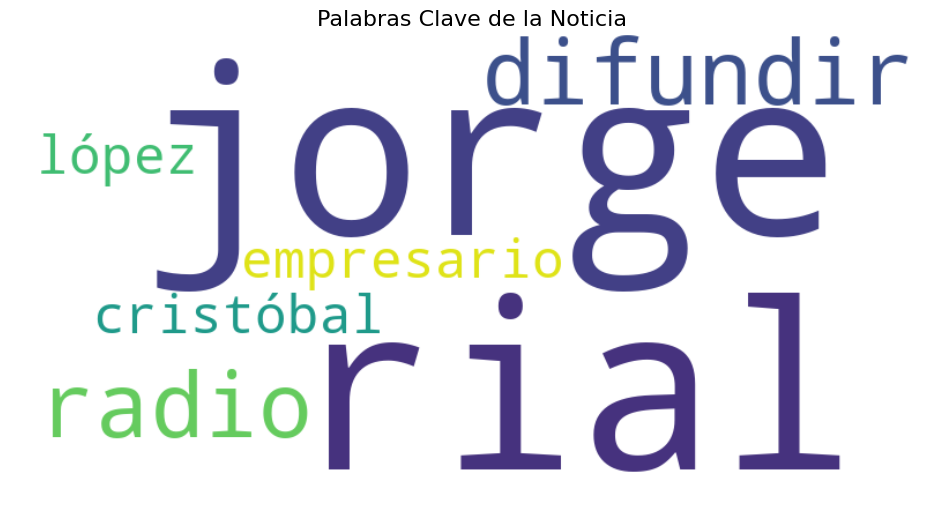

In [14]:
#Nube de palabras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

if frecuencia_palabras:
    print("--- Generando Nube de Palabras ---")

    wordcloud = WordCloud(
        width=800, height=400, background_color='white',
        colormap='viridis', max_words=50,
    ).generate_from_frequencies(frecuencia_palabras)

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title('Palabras Clave de la Noticia', fontsize=16)
    ax.axis('off')
    plt.show()